In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Exercice 1 : Health Expectancy


In [3]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


1. Déterminez quelles sont les variables Discrètes et Continues du dataset

2. Analysez la variable "Pays".

3. Analysez la variable « Sending_USD ».

- Formulez dans une phrase claire ce que signifie la moyenne issue de cette analyse (Attention, soyez vraiment précis, c'est important)

- Réalisez les 2 graphiques utiles pour cette analyse

4. Faites de même pour la variable "Life_Expectancy"

5. Observez l'évolution de la durée de vie à travers le temps.

6. Oups... Comment améliorer ce graphique ?

7. Observez l'évolution des dépenses en santé de l'Allemagne et de la Grande Bretagne à travers le temps.

8. Observez l'histogramme, la boxplot et les statistiques de "Life_Expectancy" propres à chaque pays.

9. Observez la relation entre la durée de vie et les dépenses dans la santé, aux États-Unis, de 2000 à 2020

10. Il y a une valeur abérante tant tout cela. Laquelle ? Pourquoi ?

In [4]:
df.nunique()

Year                51
Country              6
Spending_USD       274
Life_Expectancy    118
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


1.
- variables discrètes :  Year and Country
- variables continues : Spending_USD and Life_Expectancy

2. Analsye de la variable `Country`


In [25]:
df['Country'].value_counts(normalize=True).round(2)

Country
Japan            0.19
USA              0.19
Germany          0.18
Canada           0.16
Great Britain    0.16
France           0.13
Name: proportion, dtype: float64

In [7]:
df['Country'].value_counts().sort_index() ## sort_values pour trier par valeur

Country
Canada           44
France           35
Germany          50
Great Britain    43
Japan            51
USA              51
Name: count, dtype: int64

<Axes: xlabel='Country', ylabel='count'>

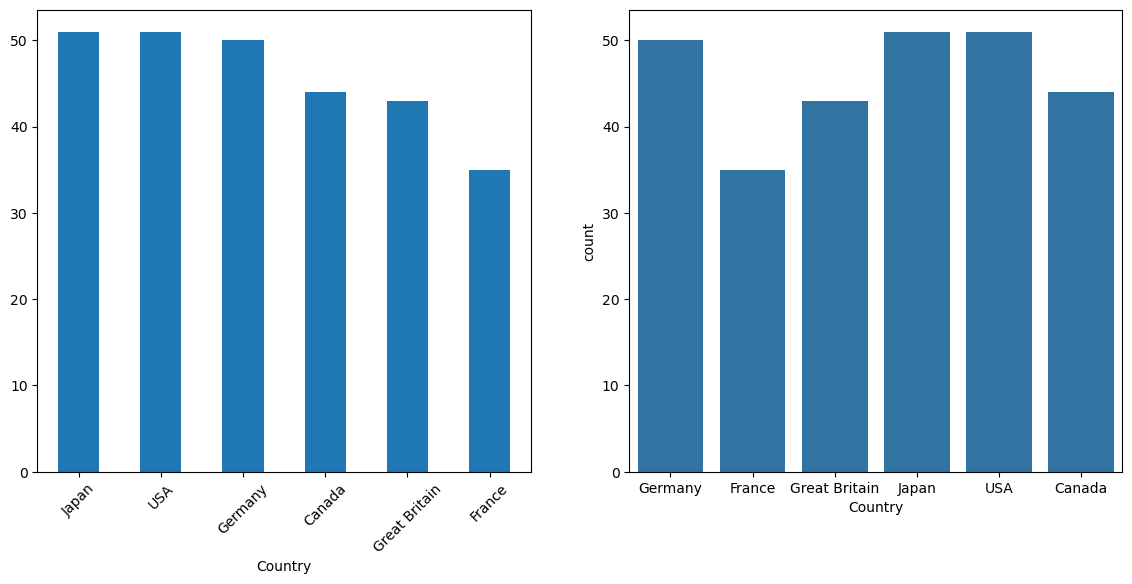

In [27]:
#  Analyse graphique
fig, ax=plt.subplots(1,2, figsize=(14,6))
# matplotlib
df['Country'].value_counts().plot(kind='bar', ax=ax[0], rot=45)
# seaborn
sns.countplot(data=df, x='Country', ax=ax[1])

3. Analysez la variable `Sending_USD`.


In [9]:
df['Spending_USD'].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

La moyenne de cette analyse donne les dépensent moyenne (2789.334 USD) par ans de tous les pays

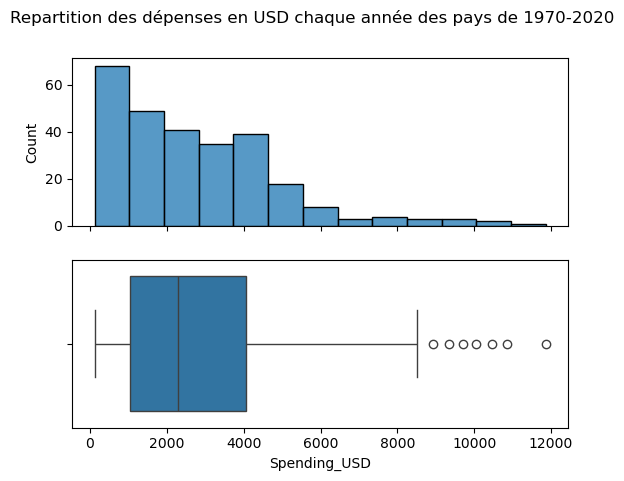

In [10]:
# analyse graphique
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df, x='Spending_USD', ax=ax[0])
sns.boxplot(df, x='Spending_USD', ax=ax[1])
plt.suptitle('Repartition des dépenses en USD chaque année des pays de 1970-2020')
plt.show()

4. Analysez la variable `Life_Expectancy`.


In [11]:
df['Life_Expectancy'].describe()

count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64

- La durée de vie moyenne des habitants  est d'envirion 77.91 ans de 1970-2020
- avce un écart type de 3.276 ans

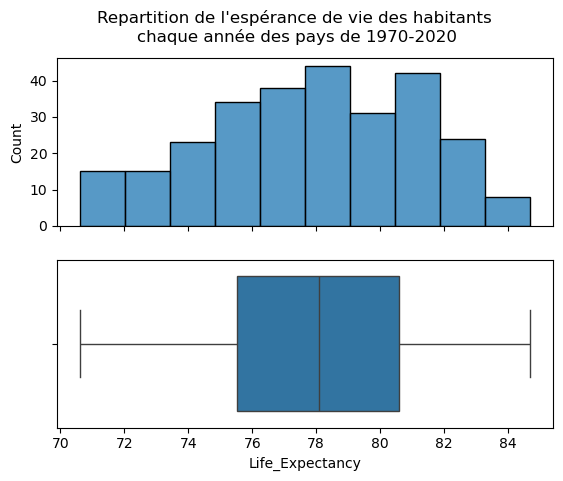

In [12]:
# analyse graphique
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df, x='Life_Expectancy', ax=ax[0])
sns.boxplot(df, x='Life_Expectancy', ax=ax[1])
plt.suptitle("Repartition de l'espérance de vie des habitants \nchaque année des pays de 1970-2020")
plt.show()

5. évolution de la durée de vie à travers le temps.


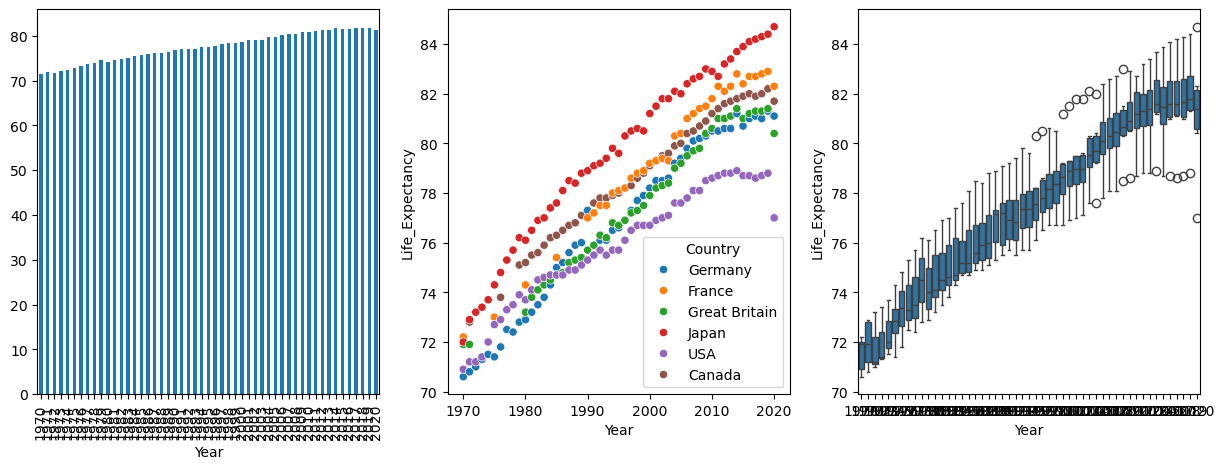

In [13]:
fig, ax = plt.subplots(1,3,figsize= (15,5))
df.groupby('Year')['Life_Expectancy'].mean().plot(kind='bar',ax=ax[0])  # un bar n'est pas visible car nous avon trop de modaltés

sns.scatterplot(df, x='Year', y='Life_Expectancy', hue='Country',ax=ax[1])
sns.boxplot(df, x='Year', y='Life_Expectancy',ax=ax[2])
plt.show()

7. évolution des dépenses en santé de l'Allemagne et de la Grande Bretagne à travers le temps.

Text(0.5, 0.98, 'Evolution dépenses santé Germany vs Great Britain')

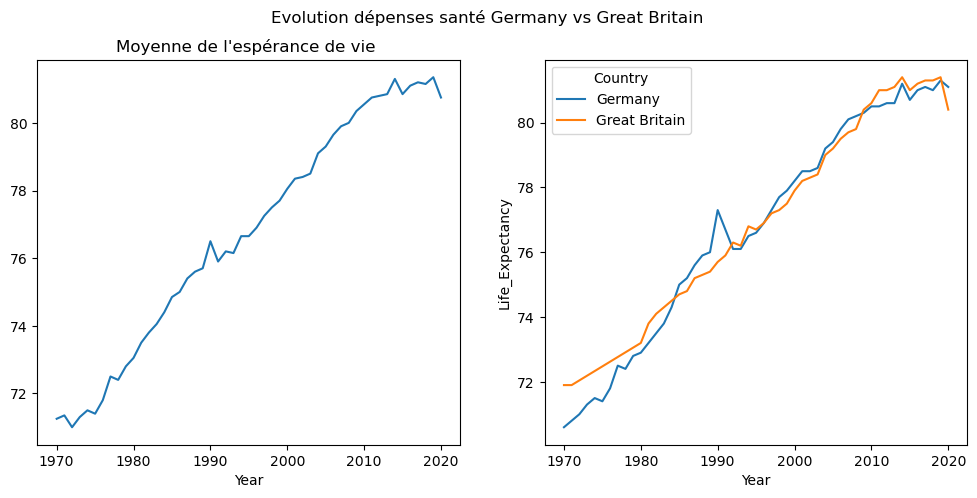

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# donnée sur la germany et great britain
df_germany_Britain = df[df['Country'].isin(['Germany','Great Britain'])]
# matplotlib
df_germany_Britain.groupby('Year')['Life_Expectancy'].mean().plot(ax=ax[0])
ax[0].set_title("Moyenne de l'espérance de vie ")

# serborn
sns.lineplot(df_germany_Britain, x='Year', y='Life_Expectancy', hue='Country',ax=ax[1])
plt.suptitle('Evolution dépenses santé Germany vs Great Britain')

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

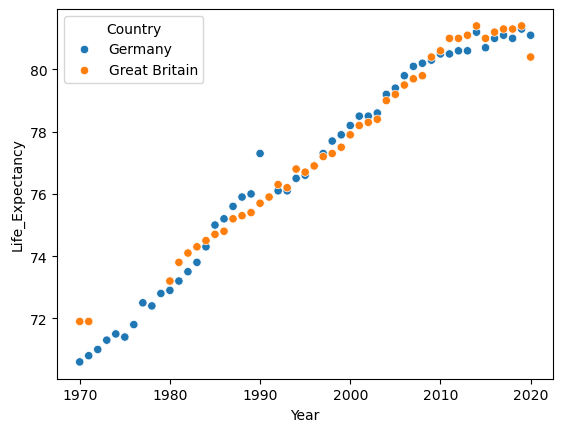

In [15]:
## Avec query

sns.scatterplot(data=df.query("`Country`=='Germany'| `Country` =='Great Britain'"), x='Year', y='Life_Expectancy', hue='Country')

8. L'histogramme, la boxplot et les statistiques de "Life_Expectancy" propres à chaque pays.


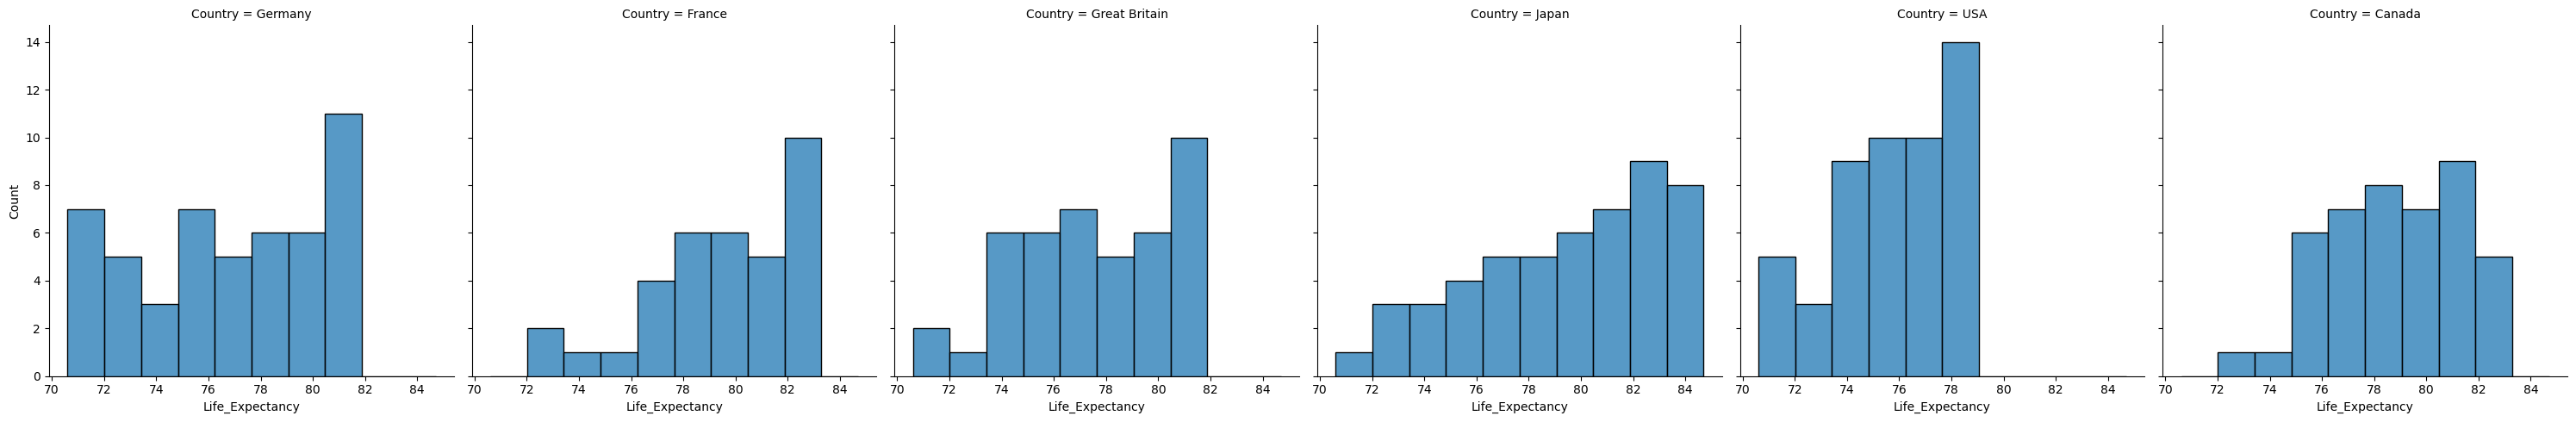

In [29]:
# histogramme
sns.displot(df, x='Life_Expectancy', col='Country')
plt.show()


<Axes: xlabel='Country', ylabel='Life_Expectancy'>

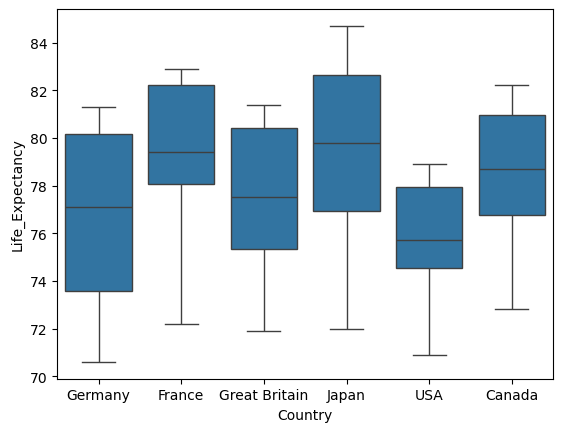

In [17]:
# boite à moustache
sns.boxplot(df, y='Life_Expectancy', x='Country')


In [18]:
# statistique
df.groupby('Country')['Life_Expectancy'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,44.0,78.706818,2.502222,72.8,76.775,78.7,80.975,82.2
France,35.0,79.565714,2.862120,72.2,78.050,79.4,82.200,82.9
Germany,50.0,76.726000,3.473915,70.6,73.575,77.1,80.175,81.3
Great Britain,43.0,77.620930,2.827548,71.9,75.350,77.5,80.400,81.4
Japan,51.0,79.554902,3.547242,72.0,76.950,79.8,82.650,84.7
USA,51.0,75.843137,2.336258,70.9,74.550,75.7,77.950,78.9


9. la relation entre la durée de vie et les dépenses dans la santé, aux États-Unis, de 2000 à 2020


C:\Users\dalko\AppData\Local\Temp\ipykernel_25792\4023847900.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_USA = df.loc[df['Country']=='USA'][df['Year'].isin(anne2000_2020)]


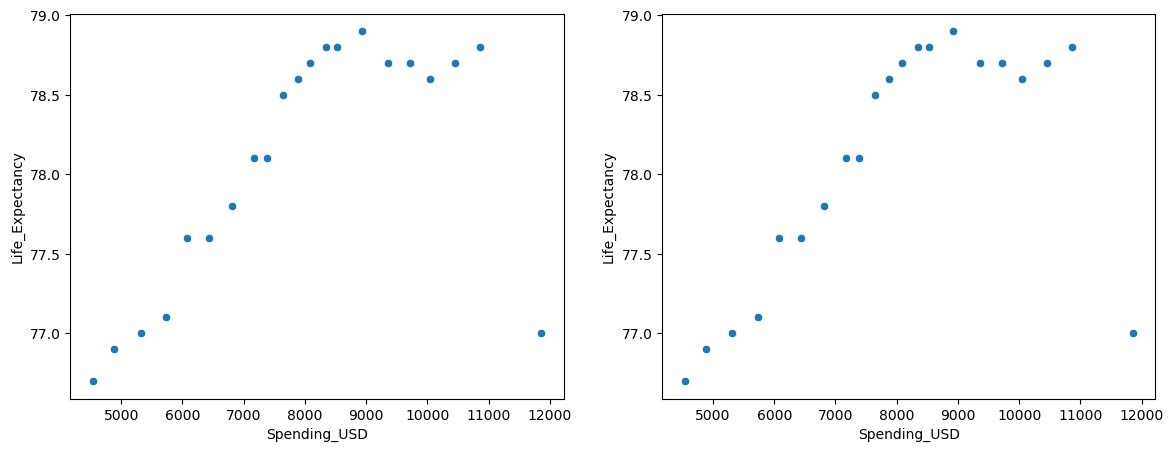

In [19]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

# estration des années de 2000-2020
anne2000_2020 = [2000+i for i in range(21)]
df_USA = df.loc[df['Country']=='USA'][df['Year'].isin(anne2000_2020)]
sns.scatterplot(df_USA , x='Spending_USD', y='Life_Expectancy', ax = ax[0])

# avec query
sns.scatterplot(df.query("`Country` == 'USA' & `Year` >=2000" ) , x='Spending_USD', y='Life_Expectancy', ax=ax[1])
plt.show()

10. Il y a une valeur abérante tant tout cela. Laquelle ? Pourquoi ?

Nous observons la présence d'une valeur abérante

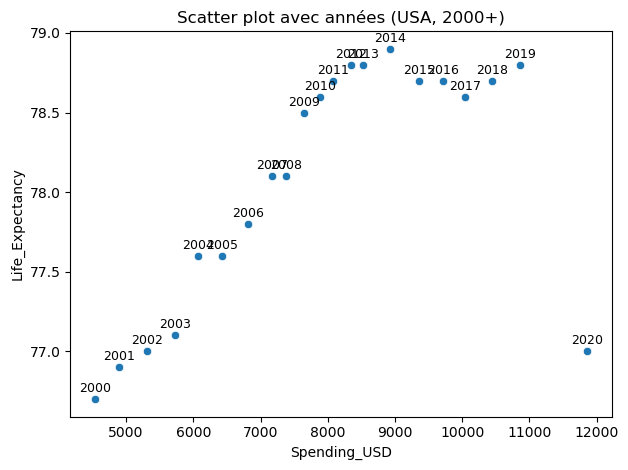

In [20]:

# Scatter plot avec annotation des années
sns.scatterplot(df.query("`Country` == 'USA' & `Year` >= 2000"), 
                x='Spending_USD', y='Life_Expectancy')

# Ajouter les annotations pour chaque point (année)
for i in range(len(df)):
    if df.iloc[i]['Country'] == 'USA' and df.iloc[i]['Year'] >= 2000:
        plt.annotate(df.iloc[i]['Year'], 
                       (df.iloc[i]['Spending_USD'], df.iloc[i]['Life_Expectancy']),
                       textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)

# Titre et autres ajustements
plt.title("Scatter plot avec années (USA, 2000+)")
plt.tight_layout() #est utilisée pour ajuster automatiquement les éléments de votre
                   #graphique afin d'éviter les chevauchements entre les différents composants, tels que les axes, titres, légendes, etc.
plt.show()


df